In [ ]:
!pip install pandas matplotlib transformers torch google-generativeai

Device set to use cpu


Installing required packages...
pip install pandas matplotlib transformers torch google-generativeai

Starting demo...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random
from transformers import pipeline
import google.generativeai as genai
import warnings
warnings.filterwarnings('ignore')

# Configure Gemini API for response generation (replace with your actual API key)
genai.configure(api_key='yAdFVt-cKYvwnofSXQkiTiTrBquLlvfe8') 
gemini_model = genai.GenerativeModel('gemini-2.0-flash')

# Set up HuggingFace pipeline for sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis",
                             model="distilbert-base-uncased-finetuned-sst-2-english")

class SteamNoodlesFeedbackSystem:
    def __init__(self, csv_path):
        self.data = pd.read_csv(csv_path)

    """Simplified system for processing feedback and visualizing sentiment"""


    def analyze_sentiment(self, text):
     
        result = sentiment_pipeline(text)[0]
        return result['label'].lower()  # Returns 'positive' or 'negative'

    def generate_response(self, feedback_text):
      
        sentiment = self.analyze_sentiment(feedback_text)

        # Map DistilBERT sentiment to include 'neutral' if needed
        sentiment_key = sentiment if sentiment in ['positive', 'negative'] else 'neutral'

        # Prompt for Gemini to generate a response
        prompt = f"""
        You are a customer service representative for SteamNoodles restaurant chain.
        Customer Feedback: {feedback_text}
        Detected Sentiment: {sentiment_key}

        Generate a professional, empathetic response that:
        - Thanks the customer for their feedback
        - Addresses their specific concerns if negative
        - Shows enthusiasm if positive
        - Offers next steps if needed
        - Keeps the response under 50 words
        - Uses a friendly, professional tone

        Response:
        """

        try:
            response = gemini_model.generate_content(prompt)
            generated_response = response.text.strip()
        except Exception as e:
            # Fallback responses if Gemini API fails
            print(f"Gemini API error: {e}")
            fallback_responses = {
                'positive': "Thank you for your great feedback! We're thrilled you enjoyed SteamNoodles. Come back soon! 🍜",
                'negative': "We're sorry for your experience. Please email feedback@steamnoodles.com to help us improve. 🙏",
                'neutral': "Thanks for your feedback! We appreciate your thoughts and hope to see you again at SteamNoodles."
            }
            generated_response = fallback_responses[sentiment_key]

        return {
            "feedback": feedback_text,
            "sentiment": sentiment_key,
            "response": generated_response
        }



    def create_bar_plot(self, date_range="last 7 days"):
        """Create a bar plot of sentiment distribution for the last 7 days"""

        # Load the CSV file


        # Count sentiments
        sentiment_counts = self.data['sentiment'].value_counts()

        # Create bar plot
        plt.figure(figsize=(8, 5))
        bars = plt.bar(sentiment_counts.index, sentiment_counts.values,
                      color=['#2ecc71', '#f39c12', '#e74c3c'])

        # Add labels and title
        plt.title(f'SteamNoodles Sentiment Distribution - {date_range}')
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Reviews')

        # Add value labels on top of bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
                    ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        return f"Bar plot created for {date_range}"

if __name__ == "__main__":
    # Required installations:
    # pip install pandas matplotlib transformers torch google-generativeai
    print("Installing required packages...")
    print("pip install pandas matplotlib transformers torch google-generativeai")
    print("\nStarting demo...")

    # demo_system()

Device set to use cpu


Installing required packages...
pip install pandas matplotlib transformers torch google-generativeai

Starting demo...


# Draw distribution of last 7 days


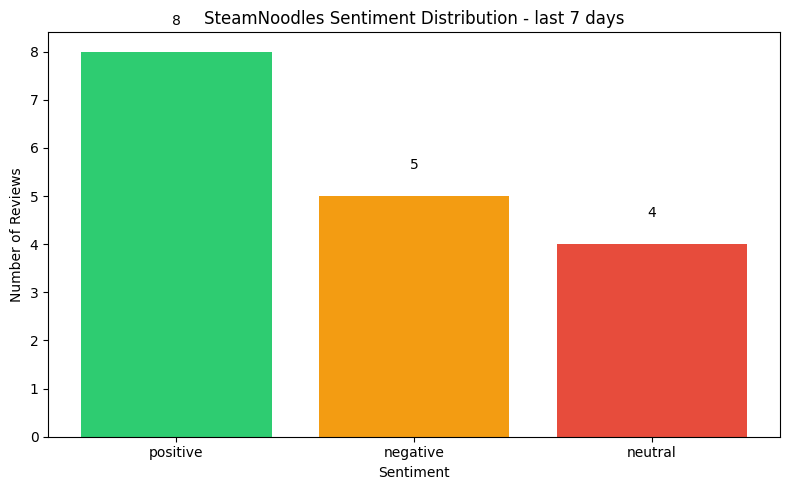


✅ Bar plot created for last 7 days


In [58]:
csv_file_path = "/content/restaurant_reviews.csv"  # Update with correct path

    # Create system and run
system = SteamNoodlesFeedbackSystem(csv_file_path)

# Generate bar plot
result = system.create_bar_plot()
print(f"\n✅ {result}")

# Generate response for a sample input


# Get feedback respose from sentiment model and generate text from gemini flash model

In [60]:
feedback = "The noodles were amazing, but the staff was rude."
response_info = system.generate_response(feedback)
print("\n Gemini Response:")
print("Feedback:", response_info["feedback"])
print("Sentiment:", response_info["sentiment"])
print("Response:", response_info["response"])


 Gemini Response:
Feedback: The noodles were amazing, but the staff was rude.
Sentiment: negative
Response: Thank you for your feedback! We're thrilled you enjoyed the noodles. We sincerely apologize for the rude staff; that's not the SteamNoodles experience we aim for. We'll address this with our team to ensure better service going forward.
